In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Load data and perform initial analysis

In [21]:
pd.set_option('display.width', 1000)
data = pd.read_csv("diabetes.csv")
print(data.head(5))
print(f"\n")
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
mean      3.845052  120.894531      69.105469      20.536458   79.799479  

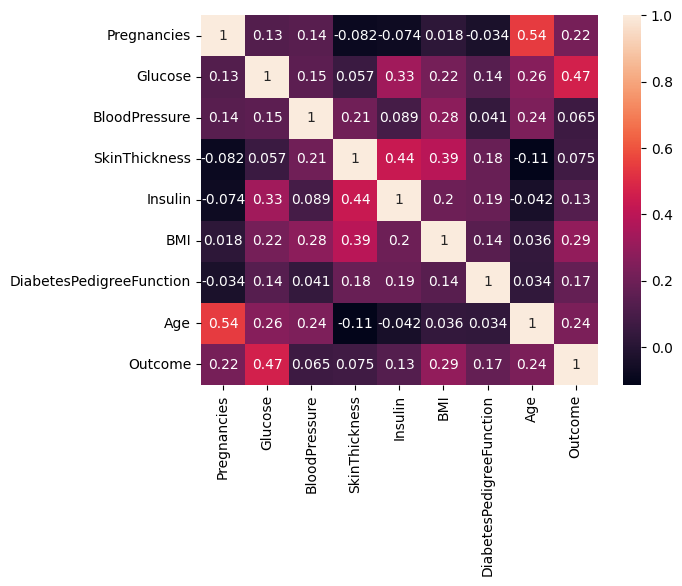

In [23]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show() ##Plot correlation matrix to understand relationship between variable

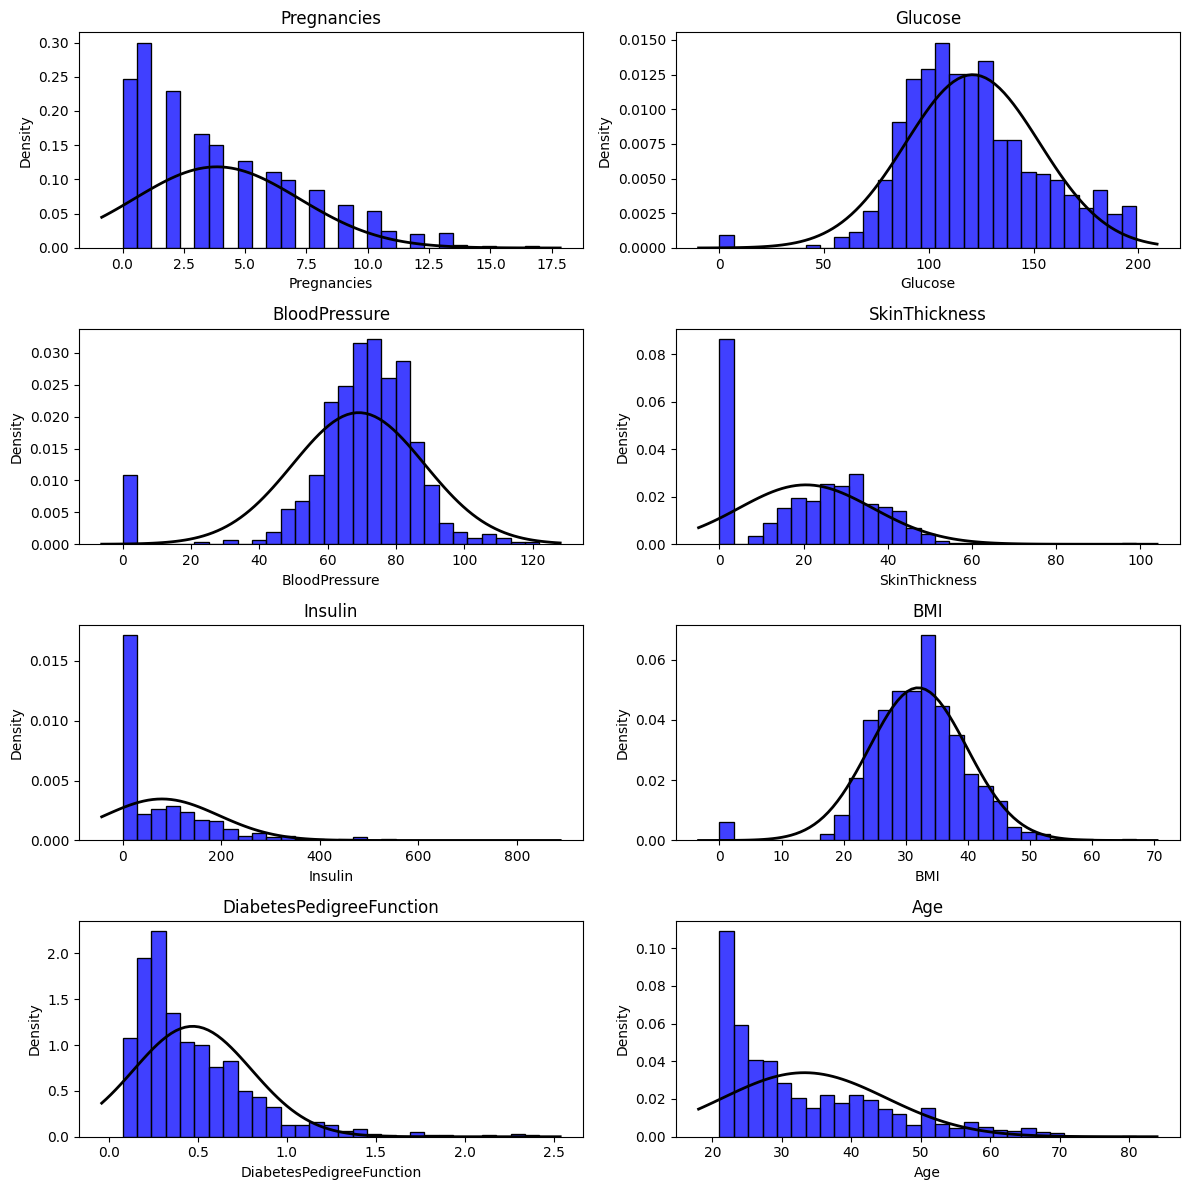

In [39]:
##Plot probability density function to undersatnd the population of data
numerical_vars = data.select_dtypes(include=['number','float']).columns
numerical_vars = numerical_vars.drop('Outcome')

plt.figure(figsize=(12, 12))
for i, var in enumerate(numerical_vars):
    plt.subplot(len(numerical_vars) // 2 + len(numerical_vars) % 2, 2, i + 1)
     # Calculate bin edges based on variable range
    min_val = data[var].min()
    max_val = data[var].max()
    bin_edges = np.linspace(min_val, max_val, 30) 
    sns.histplot(data[var], bins=bin_edges, kde=False, stat='density', color='blue', label='Histogram')
    
    # Fit a normal distribution and plot the PDF
    mu, std = norm.fit(data[var])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Normal PDF')
    
    plt.title(f'{var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    #plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [31]:
Things to do
    
1) Scatter plot each variable with out classifier
2)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')